In [1]:
# Import libraries and dependencies
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Create a function to print pretty JSON
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Assign institution ID
INSTITUTION_ID = "ins_109508"

In [6]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [7]:
# Generate a public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [8]:
# Exchange public token for an access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [9]:
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'WayNEkJB3LtBM1VgyQAKHewjEQn8gDsl1Pojo',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'ALkNrK1oJxfyPzkVDJ7QHdaPBkrD54c1A4R5W',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'GWxZadwVJyIXWr4mvlQRfky6gL74ZVH1PGJo1',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [10]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
print(datetime.timedelta(-90))
print(start_date)
print(end_date)

-90 days, 0:00:00
2020-01-28
2020-04-27


### 2. Print the categories for each transaction

In [11]:
# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

In [12]:
# See first transaction to see structure
pretty_print_response(transaction_response['transactions'][0])

{
    "account_id": "nyQEoA46vMtPJ5aoe4zrTQ7vmrb1MBH6W3PQA",
    "account_owner": null,
    "amount": 500,
    "authorized_date": null,
    "category": [
        "Food and Drink",
        "Restaurants"
    ],
    "category_id": "13005000",
    "date": "2020-04-25",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "name": "Tectra Inc",
    "payment_channel": "in store",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": null,
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "KbNkjPRLJ4FawxgXRzyAInlw9v8PBluVAEgDQ",
    "transaction_

In [13]:
# Print categories for each transaction
[t['category'][0] for t in transaction_response['transactions']]

['Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel']

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [14]:
# Creatr date, name, amount, category lists
date_ls = [t['date'] for t in transaction_response['transactions']]
name_ls = [t['name'] for t in transaction_response['transactions']]
amount_ls = [t['amount'] for t in transaction_response['transactions']]
category_ls = [t['category'][0] for t in transaction_response['transactions']]

name_ls

['Tectra Inc',
 'AUTOMATIC PAYMENT - THANK',
 'KFC',
 'Madison Bicycle Shop',
 'CREDIT CARD 3333 PAYMENT *//',
 'Uber',
 'ACH Electronic CreditGUSTO PAY 123456',
 'CD DEPOSIT .INITIAL.',
 'Touchstone Climbing',
 'United Airlines',
 "McDonald's",
 'Starbucks',
 'SparkFun',
 'INTRST PYMNT',
 'United Airlines',
 'Uber',
 'Tectra Inc',
 'AUTOMATIC PAYMENT - THANK',
 'KFC',
 'Madison Bicycle Shop',
 'CREDIT CARD 3333 PAYMENT *//',
 'Uber',
 'ACH Electronic CreditGUSTO PAY 123456',
 'CD DEPOSIT .INITIAL.',
 'Touchstone Climbing',
 'United Airlines',
 "McDonald's",
 'Starbucks',
 'SparkFun',
 'INTRST PYMNT',
 'United Airlines',
 'Uber',
 'Tectra Inc',
 'AUTOMATIC PAYMENT - THANK',
 'KFC',
 'Madison Bicycle Shop',
 'CREDIT CARD 3333 PAYMENT *//',
 'Uber',
 'ACH Electronic CreditGUSTO PAY 123456',
 'CD DEPOSIT .INITIAL.',
 'Touchstone Climbing',
 'United Airlines',
 "McDonald's",
 'Starbucks',
 'SparkFun',
 'INTRST PYMNT',
 'United Airlines',
 'Uber']

In [15]:
# Create a dictionary with panda series (columns)
df = {'date': pd.Series(date_ls),
      'name': pd.Series(name_ls),
      'amount': pd.Series(amount_ls),
      'category': pd.Series(category_ls)
     }

# Convert the dictionary into dataframe
transaction_df = pd.DataFrame(df)
transaction_df.head()

,date,name,amount,category
0,2020-04-25,Tectra Inc,500.0,Food and Drink
1,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-04-24,KFC,500.0,Food and Drink
3,2020-04-24,Madison Bicycle Shop,500.0,Shops
4,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [16]:
# Convert data types and set index
transaction_df['amount'] = transaction_df['amount'].astype('float')
transaction_df.set_index(pd.to_datetime(transaction_df['date'], infer_datetime_format=True), inplace=True)
transaction_df.head()

,date,name,amount,category
date,,,,
2020-04-25,2020-04-25,Tectra Inc,500.0,Food and Drink
2020-04-24,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-04-24,2020-04-24,KFC,500.0,Food and Drink
2020-04-24,2020-04-24,Madison Bicycle Shop,500.0,Shops
2020-04-15,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


In [17]:
transaction_df.drop(columns=['date'], inplace=True)
transaction_df.head()

,name,amount,category
date,,,
2020-04-25,Tectra Inc,500.0,Food and Drink
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-04-24,KFC,500.0,Food and Drink
2020-04-24,Madison Bicycle Shop,500.0,Shops
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [18]:
# Get Income response
Income_response = client.Income.get(access_token)
pretty_print_response(Income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "9MRwemwYWZs04jP"
}


In [19]:
# Print the previous year's gross income
Income_response['income']['last_year_income']

6000

In [20]:
# Print current montly income
Income_response['income']['income_streams'][0]['monthly_income']

500

In [21]:
# Print the projected yearly income
Income_response['income']['projected_yearly_income']

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [22]:
# Total spending per category
spending_per_category = transaction_df.groupby('category').sum()
spending_per_category

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


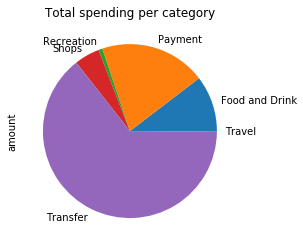

In [23]:
# Plot total spending per category
spending_per_category['amount'].plot.pie(title = 'Total spending per category')

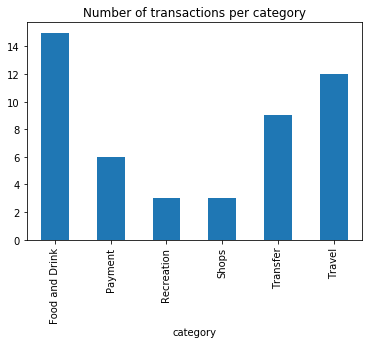

In [24]:
# Plot number of transaction per category
transaction_df.groupby('category').count()['name'].plot.bar(title = 'Number of transactions per category')

### Calculate the expenses per month

Text(0, 0.5, 'Total expenses')

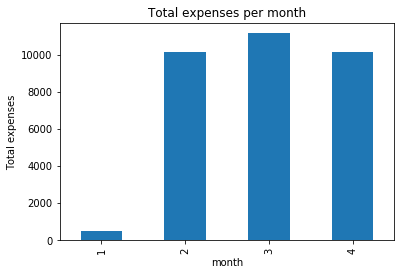

In [25]:
# Plot expenses per month
ax = transaction_df.groupby(transaction_df.index.month).sum()['amount'].plot.bar(title='Total expenses per month')
ax.set_xlabel('month')
ax.set_ylabel('Total expenses')
